In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./avoCleaned.csv')
df

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


In [3]:
df['price\''] = df['AveragePrice'].diff()
df

,Date,AveragePrice,price'
0,2015-01-04,1.301296,NaN
1,2015-01-11,1.370648,0.069352
2,2015-01-18,1.391111,0.020463
3,2015-01-25,1.397130,0.006019
4,2015-02-01,1.247037,-0.150093
...,...,...,...
164,2018-02-25,1.359630,-0.014444
165,2018-03-04,1.350185,-0.009444
166,2018-03-11,1.335093,-0.015093
167,2018-03-18,1.313704,-0.021389


In [4]:
# Initialize a variable to keep track of the last sign
last_sign = None
change_points = []
switch = []

for index, row in df.iterrows():
    current_sign = 1 if row["price'"] > 0 else -1 if row["price'"] < 0 else 0
    
    # Check if the sign has changed
    if last_sign is not None and current_sign != last_sign:
        change_points.append((row["Date"], row["price'"]))
        switch.append(True)
    else:
        switch.append(False)
    
    last_sign = current_sign

switch.pop(0)
switch.append(False)
# Print the change points
for date, price_change in change_points:
    print(f"Date: {date}, Price' Change: {price_change}")

Date: 2015-01-11, Price' Change: 0.06935185185185189
Date: 2015-02-01, Price' Change: -0.15009259259259267
Date: 2015-02-08, Price' Change: 0.06342592592592577
Date: 2015-02-22, Price' Change: -0.0249074074074076
Date: 2015-03-08, Price' Change: 0.04907407407407405
Date: 2015-03-22, Price' Change: -0.042685185185185714
Date: 2015-03-29, Price' Change: 0.04833333333333334
Date: 2015-04-12, Price' Change: -0.04898148148148129
Date: 2015-04-19, Price' Change: 0.007685185185184906
Date: 2015-05-03, Price' Change: -0.10129629629629622
Date: 2015-05-10, Price' Change: 0.03962962962962946
Date: 2015-06-07, Price' Change: -0.001481481481481639
Date: 2015-06-14, Price' Change: 0.01953703703703713
Date: 2015-06-28, Price' Change: -0.0019444444444445264
Date: 2015-07-05, Price' Change: 0.007314814814814774
Date: 2015-07-19, Price' Change: -0.028148148148148033
Date: 2015-07-26, Price' Change: 0.033333333333333215
Date: 2015-08-09, Price' Change: -0.04601851851851846
Date: 2015-08-16, Price' Chang

In [5]:
df['Price Change'] = switch
df

,Date,AveragePrice,price',Price Change
0,2015-01-04,1.301296,NaN,True
1,2015-01-11,1.370648,0.069352,False
2,2015-01-18,1.391111,0.020463,False
3,2015-01-25,1.397130,0.006019,True
4,2015-02-01,1.247037,-0.150093,True
...,...,...,...,...
164,2018-02-25,1.359630,-0.014444,False
165,2018-03-04,1.350185,-0.009444,False
166,2018-03-11,1.335093,-0.015093,False
167,2018-03-18,1.313704,-0.021389,True


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

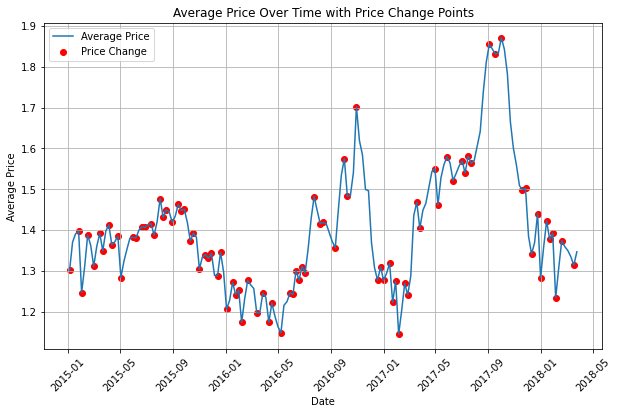

In [7]:
change_points = df[df['Price Change']]

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AveragePrice'], label='Average Price')
plt.scatter(change_points['Date'], change_points['AveragePrice'], c='red', label='Price Change')

plt.title('Average Price Over Time with Price Change Points')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

In [8]:
df.to_csv('./avo_change_dates.csv')